<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP_2022/blob/main/02-Machine-Learning/notebooks/09-Decision-Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árboles de decisión

En esta notebook usaremos el clasificador [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) de scikit-learn. 

Primero, observaremos algunas caracteristicas generales del método y después, lo usaremos en un problema de clasificación con un dataset clásico del machine learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Ejemplo 1: Un ejemplo para explorar las características del clasificador DT

## 1. Datos linealmente separables con una línea horizontal

En este primer ejemplo generamos un conjunto de datos linealmente separables con `make_blobs`. Estos datos pueden ser separados con una línea vértical, es decir con una condición de tipo

* Si $x>\alpha$ entonces $(x,y)\in\text{clase}_0$.
* Si $x<\alpha$ entonces $(x,y)\in\text{clase}_1$.

Primero, generamos y visualizamos los datos

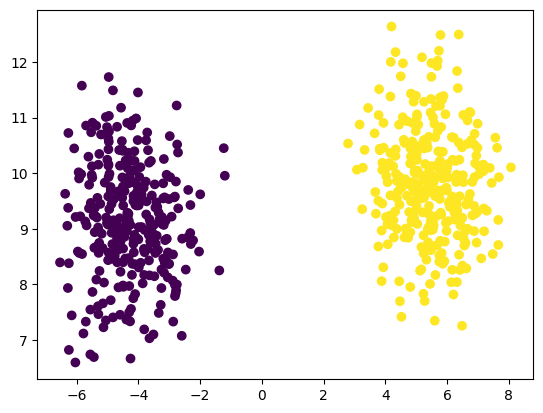

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=600,centers=2,random_state=31)

plt.figure()
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

Dividimos los datos en *train/test*. Entrenamos el árbol de decisión usando la implementación de scikit-learn `sklearn.tree.DecisionTreeClassifier`. Realizamos la predicción sobre el conjunto de prueba.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) # 70% training and 30% test

clf = DecisionTreeClassifier()  # Inicializar el modelo
clf = clf.fit(X_train,y_train)  # Entrenar el modelo
y_pred = clf.predict(X_test)    # Predecir las etiquetas para el conjunto de prueba

Como es de esperar, obtenemos el 100% en todas las métricas

Accuracy: 1.0
Recall: 1.0
Precision: 1.0


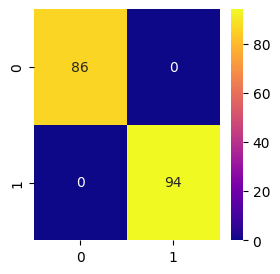

In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score

print(f"Accuracy: {round(accuracy_score(y_test,y_pred),3)}")
print(f"Recall: {round(recall_score(y_test,y_pred),5)}")
print(f"Precision: {round(precision_score(y_test,y_pred),3)}")

plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test,y_pred)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True)
plt.show()

Veamos el árbol de decisión usando el módulo `tree` de scikit-learn.

In [5]:
from sklearn import tree

text_representation = tree.export_text(decision_tree=clf)
print(text_representation)

|--- feature_0 <= 0.80
|   |--- class: 0
|--- feature_0 >  0.80
|   |--- class: 1



Visualizamos la *frontera de decisión* usando `dtreeviz`. Esta es una biblioteca python para la visualización de árboles de decisión y la interpretación de modelos ([documentación](https://github.com/parrt/dtreeviz)).

In [6]:
!pip install -qq dtreeviz

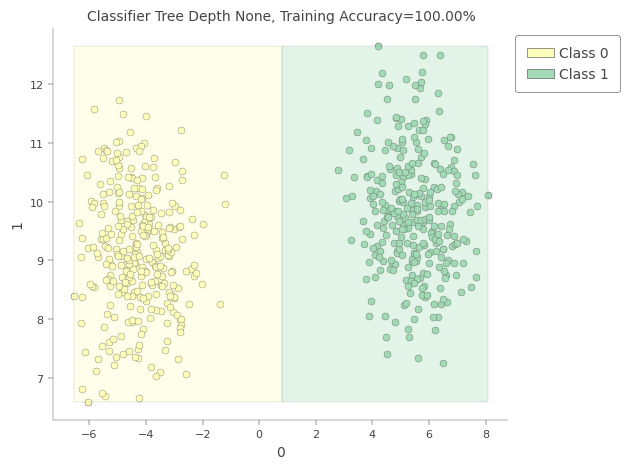

In [7]:
# from dtreeviz.trees import ctreeviz_bivar
from dtreeviz import model

# ct = ctreeviz_bivar(clf, X, y, feature_names = ['0','1'],fontname='DejaVu Sans')
ct = model(clf, X, y, feature_names = ['0','1'])
ct.ctree_feature_space(fontname='DejaVu Sans')

plt.tight_layout()
plt.show()

## Datos linealmente separables con una línea con pendiente $m\neq 0$.

Transformamos los datos para ahora sean separables con línea no horizontal. Para esto, rotamos cada punto un ángulo $\theta=\frac{\pi}{4}=45°$; esto lo hacemos multiplicando por la matriz de rotación:

$$R=\left(\begin{array}{cc}\cos(\frac{\pi}{4}) & -\sin(\frac{\pi}{4}) \\
\sin(\frac{\pi}{4}) & \cos(\frac{\pi}{4})\end{array}\right)$$

<br>

$$X_r = (R\cdot X^T)^T$$

Después trasladamos la clase *amarilla* con el vector $z=(-1,-2)$.


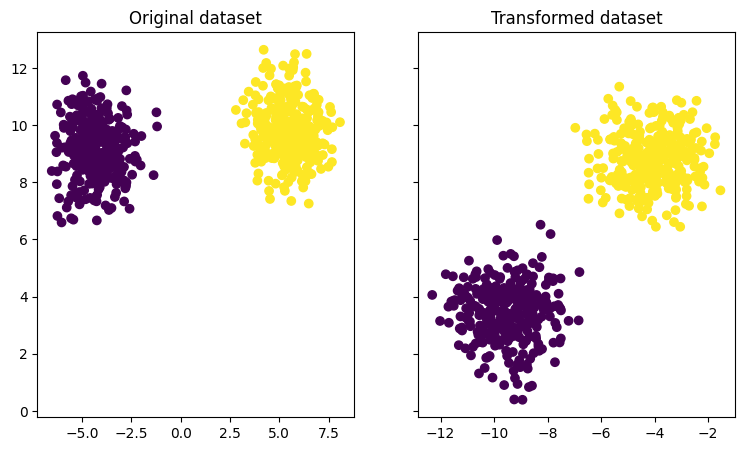

In [8]:
import numpy as np

theta = np.pi/4 # Ángulo de rotación
R = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]]) # Matriz de rotación

Xr = np.transpose(R@np.transpose(X)) # Rotamos el dataset

idxs = np.where(y==1)[0]   # Obtenemos los índices donde y=1

Xr[idxs,:] = Xr[idxs,:] + np.array([-1,-2])

fig, axs = plt.subplots(1,2,figsize=(9,5),sharey=True)
axs[0].scatter(X[:,0],X[:,1],c=y)
axs[0].set_title("Original dataset")
axs[1].scatter(Xr[:,0],Xr[:,1],c=y)
axs[1].set_title("Transformed dataset")
fig.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(Xr, y, test_size=0.3, random_state=101) # 70% training and 30% test

clf = DecisionTreeClassifier()  # Create Decision Tree classifier object
clf = clf.fit(X_train,y_train)  # Train Decision Tree Classifier
y_pred = clf.predict(X_test)    # Predict the response for test dataset

Dados que los datos siguen siendo linealmente separables, seguimos obteniendo el 100% en todas las métricas.

Accuracy: 1.0
Recall: 1.0
Precision: 1.0


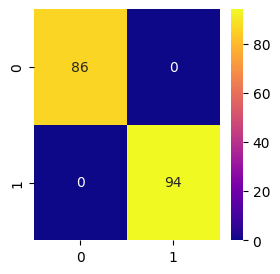

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score

print(f"Accuracy: {round(accuracy_score(y_test,y_pred),3)}")
print(f"Recall: {round(recall_score(y_test,y_pred),5)}")
print(f"Precision: {round(precision_score(y_test,y_pred),3)}")

plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test,y_pred)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g')
plt.show()

Sin embargo, el árbol empieza a hacerse más complejo.

In [11]:
from sklearn import tree

text_representation = tree.export_text(decision_tree=clf)
print(text_representation)

|--- feature_1 <= 6.32
|   |--- class: 0
|--- feature_1 >  6.32
|   |--- feature_0 <= -7.61
|   |   |--- class: 0
|   |--- feature_0 >  -7.61
|   |   |--- class: 1



La frontera de decisión no es la que esperaríamos:

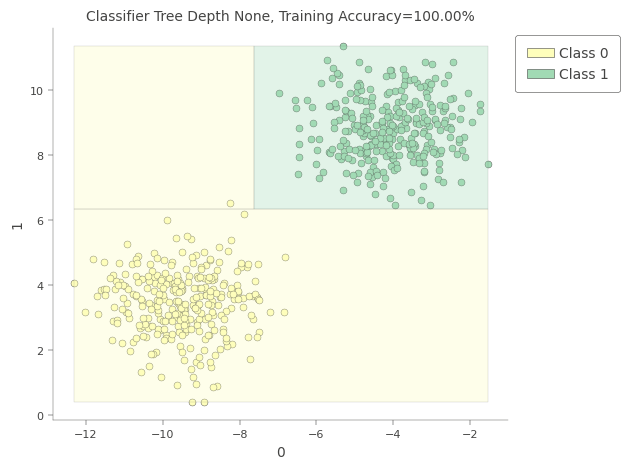

In [12]:
from dtreeviz import model

ct = model(clf, Xr, y, feature_names = ['0','1'])
ct.ctree_feature_space(fontname='DejaVu Sans')
plt.tight_layout()
plt.show()

Como podemos ver, este clasificador no separa con una línea en general, aún si los datos son linealmente separables. Separa con una FD compuesta de segmentos de línea verticales y horizontales.

## Efecto de perturbaciones

Ahora, observemos el efecto de perturbar levemente el conjunto de datos. ¿Qué le pasa al arbol de decisión?

Movemos un par de puntos cerca de la FD.

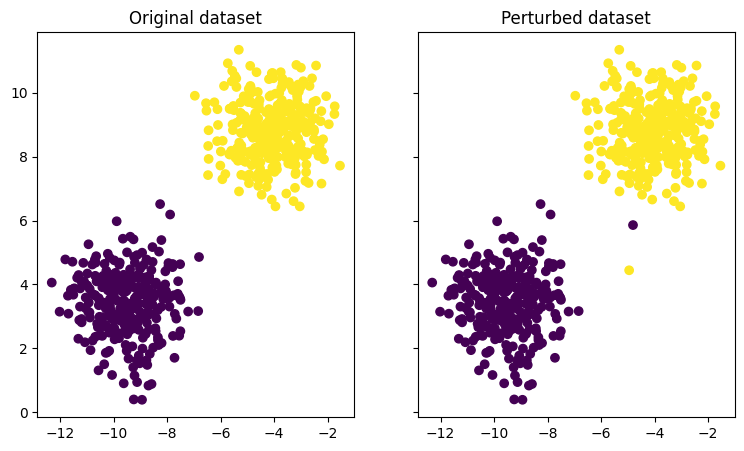

In [13]:
Xrp = Xr.copy()
Xrp[192] = Xrp[192] + np.array([-1,-2])
Xrp[486] = Xrp[486] + np.array([2,1])

fig, axs = plt.subplots(1,2,figsize=(9,5),sharey=True)
axs[0].scatter(Xr[:,0],Xr[:,1],c=y)
axs[0].set_title("Original dataset")
axs[1].scatter(Xrp[:,0],Xrp[:,1],c=y)
axs[1].set_title("Perturbed dataset")
fig.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(Xrp, y, test_size=0.3, random_state=101) # 70% training and 30% test

clf = DecisionTreeClassifier()  # Create Decision Tree classifier object
clf = clf.fit(X_train,y_train)  # Train Decision Tree Classifier
y_pred = clf.predict(X_test)    # Predict the response for test dataset

Accuracy: 0.994
Recall: 0.98936
Precision: 1.0


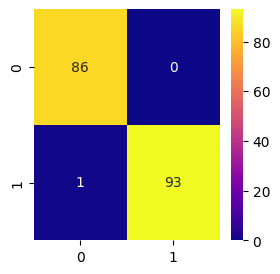

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score

print(f"Accuracy: {round(accuracy_score(y_test,y_pred),3)}")
print(f"Recall: {round(recall_score(y_test,y_pred),5)}")
print(f"Precision: {round(precision_score(y_test,y_pred),3)}")

plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test,y_pred)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g')
plt.show()

In [16]:
from sklearn import tree

text_representation = tree.export_text(decision_tree=clf)
print(text_representation)

|--- feature_1 <= 6.59
|   |--- feature_0 <= -5.90
|   |   |--- class: 0
|   |--- feature_0 >  -5.90
|   |   |--- feature_1 <= 5.15
|   |   |   |--- class: 1
|   |   |--- feature_1 >  5.15
|   |   |   |--- class: 0
|--- feature_1 >  6.59
|   |--- class: 1



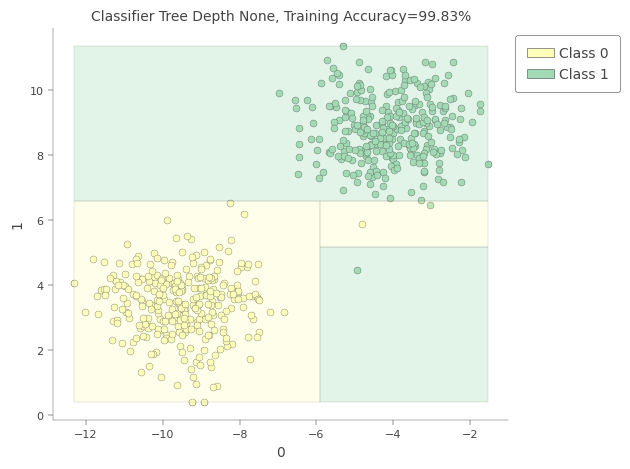

In [17]:
from dtreeviz import model

ct = model(clf, Xrp, y, feature_names = ['0','1'])
ct.ctree_feature_space(fontname='DejaVu Sans')
plt.tight_layout()
plt.show()

# Ejemplo 2

## 1. El conjunto de datos

Este dataset fue creado por el *National Institute of Diabetes and Digestive and Kidney Diseases* de Estados Unidos. El objetivo del dataset es predecir el diagnostico de cuándo un paciente tiene diabetes o no, basado en ciertas mediciones incluidas en el dataset. Varias restricciones fueron usadas en la selección de estas instancias para filtrar el dataset. En particular, se trata pacientes femeninas de al menos 21 años de edad pertenecientes al grupo indígena Pima de Arizona.

Las variables incluidas son el numero de embarazos la paciente ha tenido, su BMI, nivel de insulina, edad, entre otras.

El dataset se encuentra en https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database.

In [18]:
import pandas as pd

url = 'https://github.com/DCDPUAEM/DCDP/raw/main/02-Machine-Learning/data/diabetes.csv'
df = pd.read_csv(url,index_col=0)
df

pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0           6      148  72    35        0  33.6     0.627   50      1
1           1       85  66    29        0  26.6     0.351   31      0
2           8      183  64     0        0  23.3     0.672   32      1
3           1       89  66    23       94  28.1     0.167   21      0
4           0      137  40    35      168  43.1     2.288   33      1
..        ...      ...  ..   ...      ...   ...       ...  ...    ...
763        10      101  76    48      180  32.9     0.171   63      0
764         2      122  70    27        0  36.8     0.340   27      0
765         5      121  72    23      112  26.2     0.245   30      0
766         1      126  60     0        0  30.1     0.349   47      1
767         1       93  70    31        0  30.4     0.315   23      0

[768 rows x 9 columns]

## Entrenar el clasificador y resultados

Escogemos las *features* que usaremos y definimos el dataset de features y el vector de etiquetas

In [19]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']

X = df[feature_cols].values    # Features
y = df['label'].values         # Target variable

Dividimos los datos en train/test. Entrenamos el árbol de decisión usando la implementación de scikit-learn sklearn.tree.DecisionTreeClassifier. Realizamos la predicción sobre el conjunto de prueba.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

clf = DecisionTreeClassifier()  
clf = clf.fit(X_train,y_train) 
y_pred = clf.predict(X_test)   

Accuracy: 0.675
Recall: 0.51765
Precision: 0.564


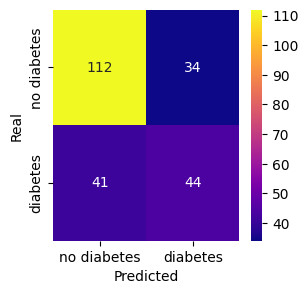

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score

print(f"Accuracy: {round(accuracy_score(y_test,y_pred),3)}")
print(f"Recall: {round(recall_score(y_test,y_pred),5)}")
print(f"Precision: {round(precision_score(y_test,y_pred),3)}")

target_labels = ['no diabetes','diabetes']

plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test,y_pred)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g',
            xticklabels=target_labels,
            yticklabels=target_labels)
s_cm.set(xlabel='Predicted',ylabel='Real')
plt.show()

Podemos obtener la importancia de las features

In [22]:
clf.feature_importances_

array([0.04118697, 0.04509466, 0.20141166, 0.09599818, 0.32238801,
       0.14931043, 0.14461009])

In [23]:
importances_df = pd.DataFrame({'feature':feature_cols,'importancia':np.round(clf.feature_importances_,3)})
importances_df.sort_values(by='importancia',ascending=False,inplace=True)
importances_df.set_index('feature')

importancia
feature              
glucose         0.322
bmi             0.201
bp              0.149
pedigree        0.145
age             0.096
insulin         0.045
pregnant        0.041

## Visualizar el árbol

### Text representation with sklearn

In [24]:
from sklearn import tree

text_representation = tree.export_text(decision_tree=clf,
                                       feature_names=feature_cols)
print(text_representation)

|--- glucose <= 129.50
|   |--- bmi <= 26.30
|   |   |--- bmi <= 9.10
|   |   |   |--- glucose <= 114.50
|   |   |   |   |--- class: 0
|   |   |   |--- glucose >  114.50
|   |   |   |   |--- class: 1
|   |   |--- bmi >  9.10
|   |   |   |--- pedigree <= 0.67
|   |   |   |   |--- class: 0
|   |   |   |--- pedigree >  0.67
|   |   |   |   |--- pedigree <= 0.71
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- pedigree >  0.71
|   |   |   |   |   |--- class: 0
|   |--- bmi >  26.30
|   |   |--- age <= 27.50
|   |   |   |--- bmi <= 45.40
|   |   |   |   |--- pregnant <= 7.00
|   |   |   |   |   |--- bp <= 12.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- bp >  12.00
|   |   |   |   |   |   |--- pedigree <= 1.27
|   |   |   |   |   |   |   |--- bmi <= 30.95
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- bmi >  30.95
|   |   |   |   |   |   |   |   |--- bp <= 53.00
|   |   |   |   |   |   |   |   |   |--- pedigree <= 0.26
|   |   |   | 

In [25]:
with open("decistion_tree_textrep.log", "w") as txt_file:
    txt_file.write(text_representation)

### Plot tree with sklearn

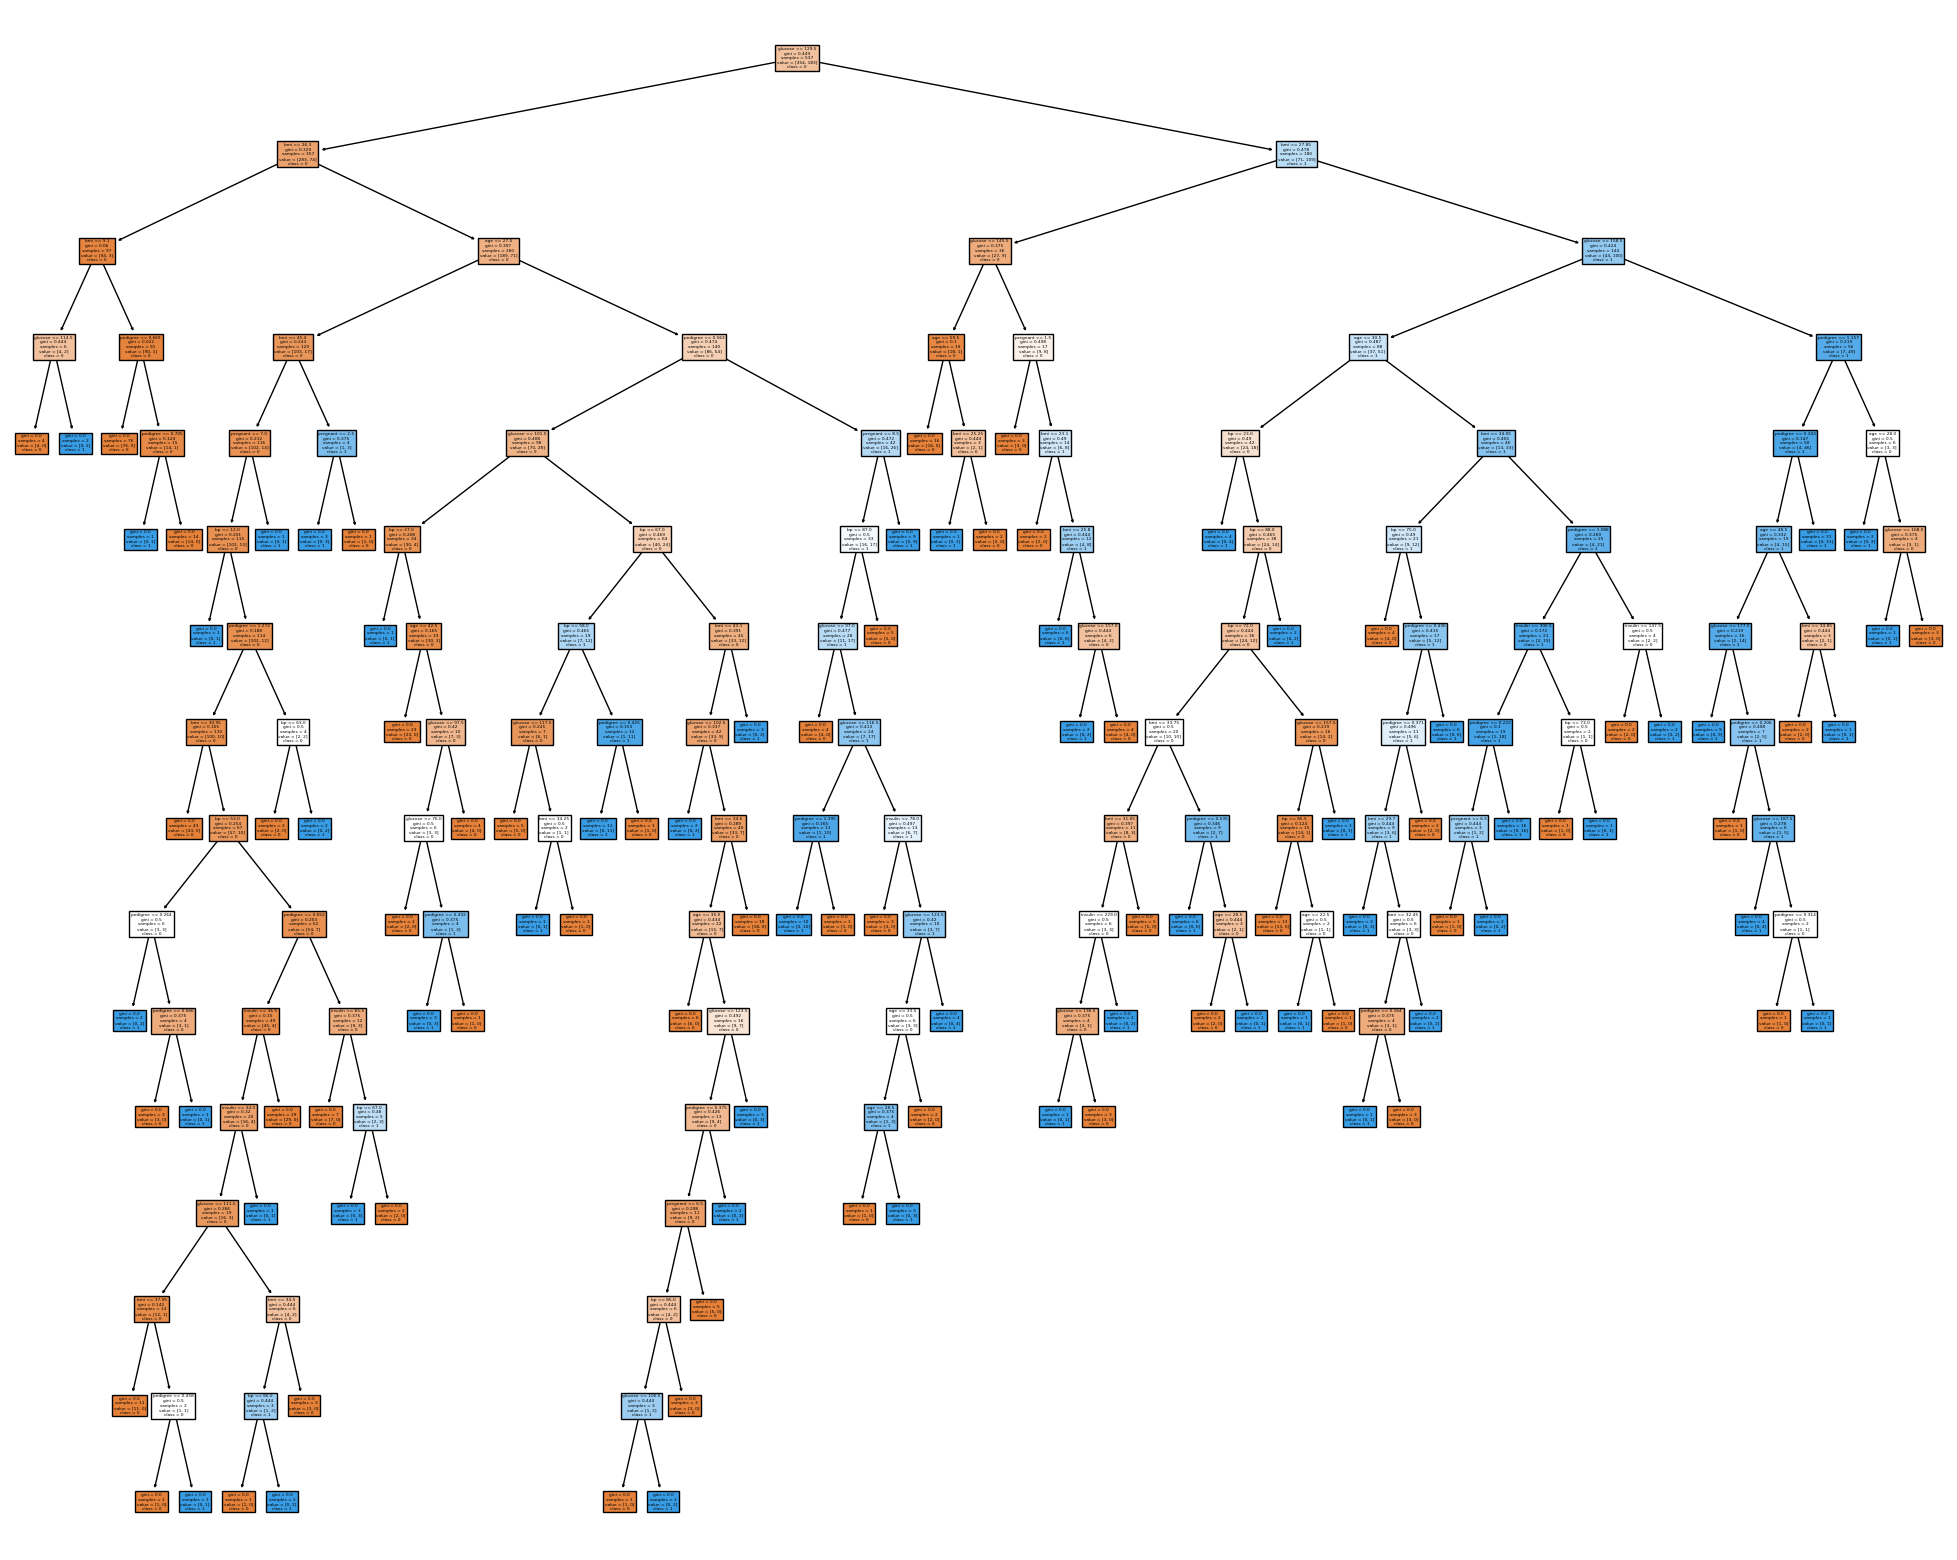

In [26]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_cols,  
                   class_names=['0','1'],
                   filled=True)


### Using [graphviz](https://graphviz.org/)

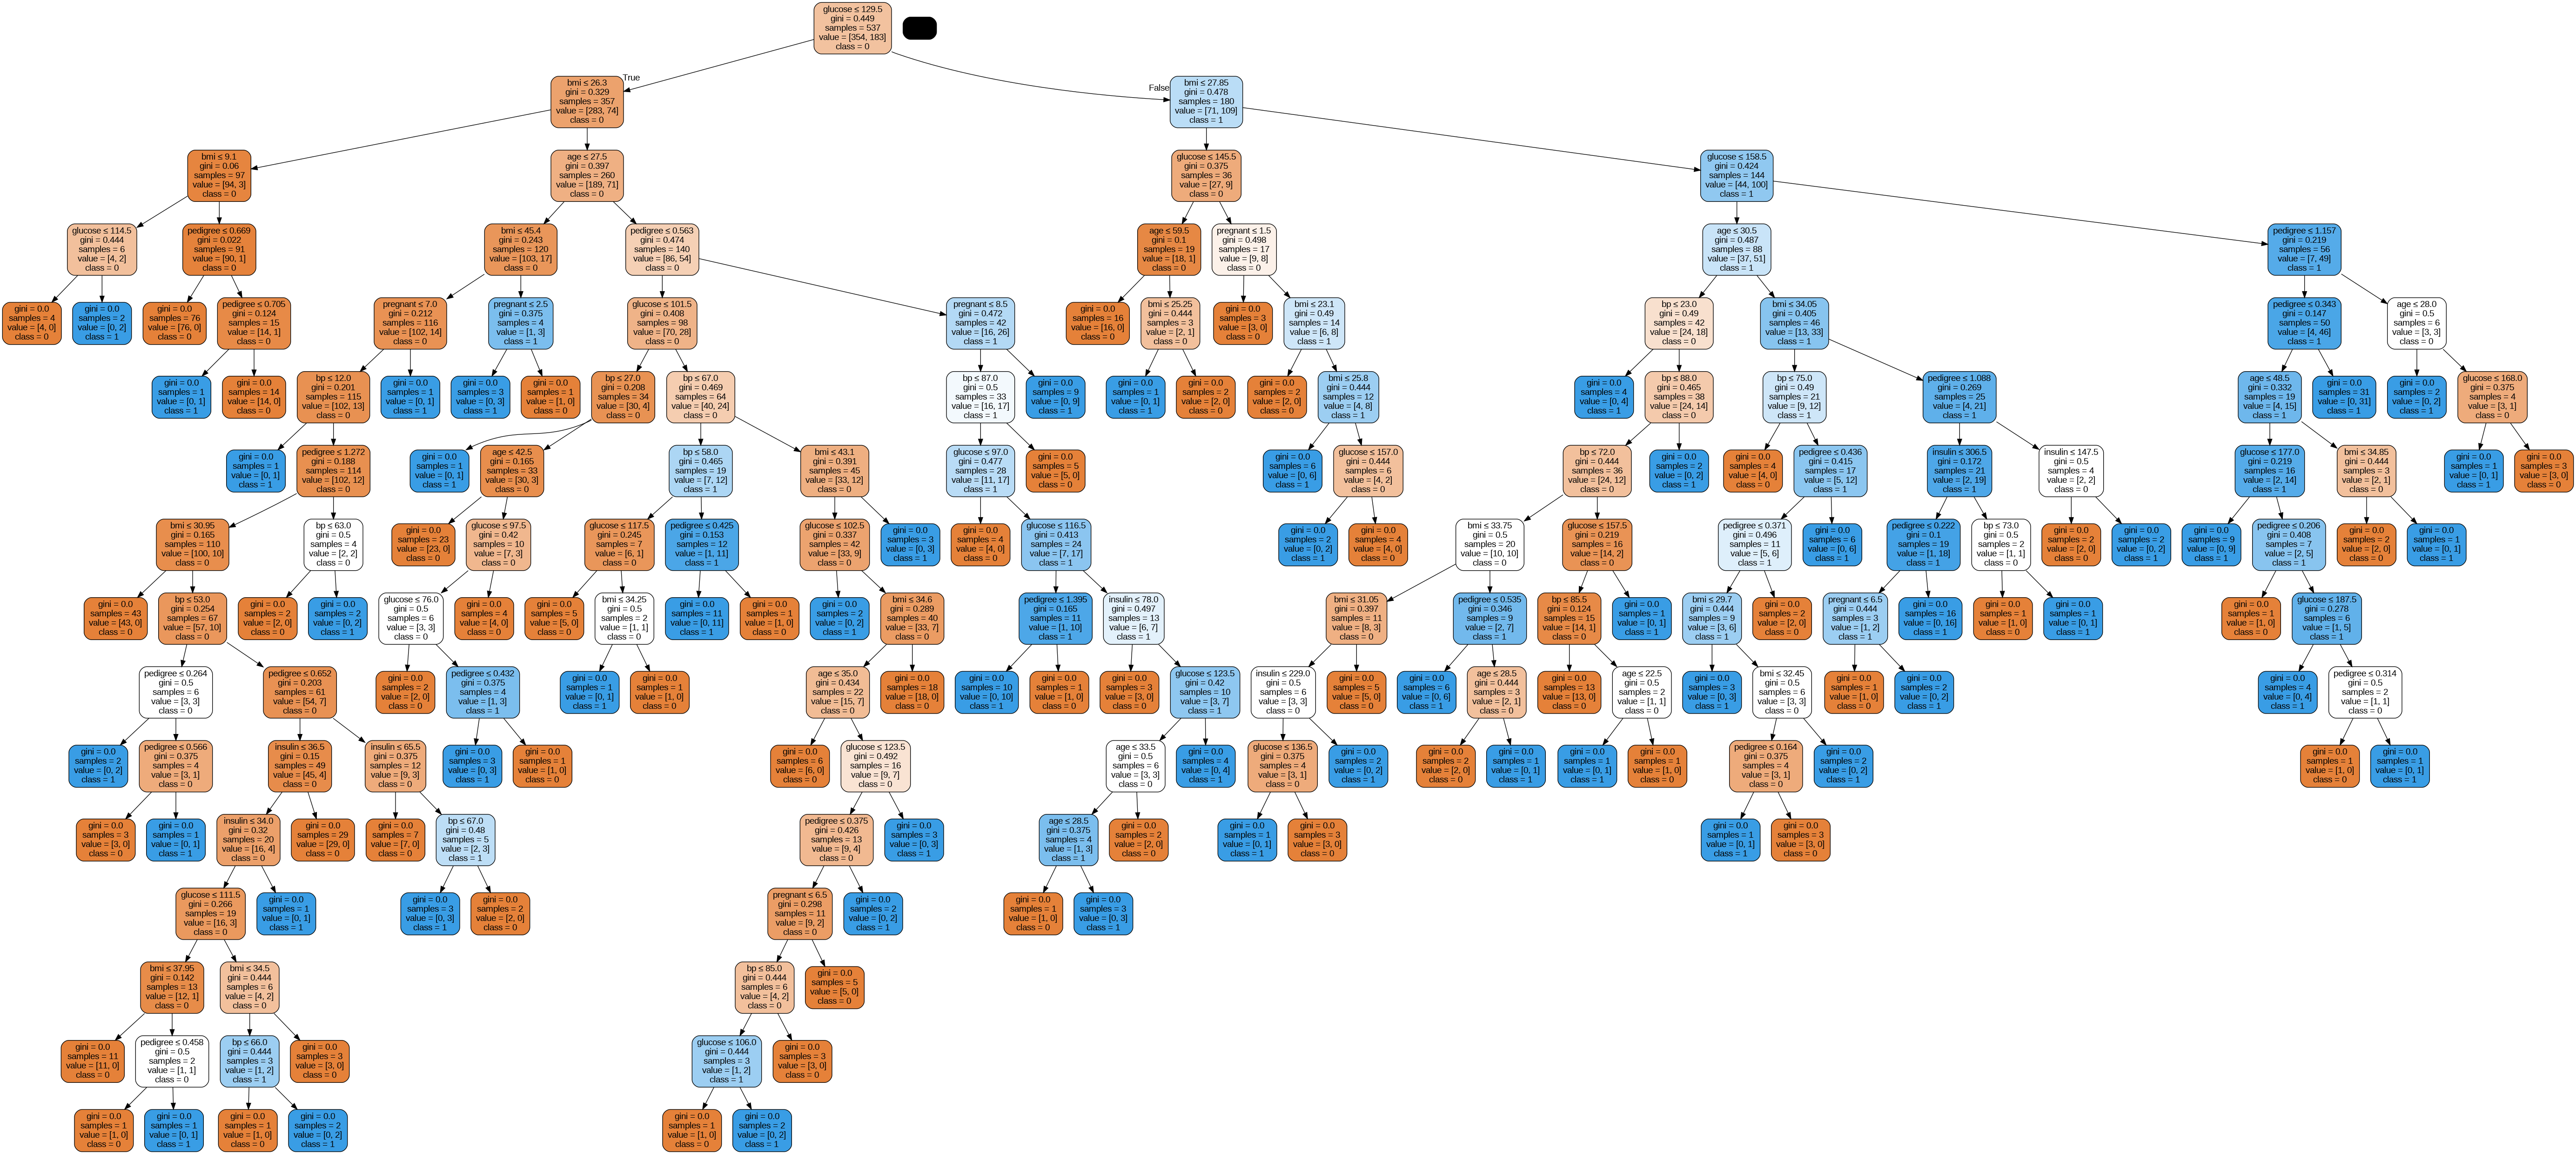

In [27]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

### Plot tree with [dtreeviz](https://github.com/parrt/dtreeviz)

In [28]:
from dtreeviz import model

ct = model(clf, X, y, feature_names = feature_cols)
ct.view(fontname='DejaVu Sans')

Output hidden; open in https://colab.research.google.com to view.

Podemos ver el proceso de visualización con una instancia concreta.

In [29]:
x = X[0]

ct.view(fontname='DejaVu Sans',
        x=x,
        orientation="LR")

Output hidden; open in https://colab.research.google.com to view.

⭕ **Práctica**:

¿Puedes subir las métricas de desempeño de este clasificador en este dataset? Considera las siguientes modificaciones:

* Observar la variable 'bmi', tiene valores 0, ¿qué sentido tienen estos?
    * Puedes quitar esas instancias.
    * Puedes quitar la variable.
* Cambiar el conjunto de features, ya sea manualmente o con algún método como [VarianceThreshold](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html#sklearn.feature_selection.VarianceThreshold), [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html), etc.
* Normalizar o estadarizar los datos.
* Realizar un gridsearch en los parámetros del clasificador.

In [30]:
df

pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0           6      148  72    35        0  33.6     0.627   50      1
1           1       85  66    29        0  26.6     0.351   31      0
2           8      183  64     0        0  23.3     0.672   32      1
3           1       89  66    23       94  28.1     0.167   21      0
4           0      137  40    35      168  43.1     2.288   33      1
..        ...      ...  ..   ...      ...   ...       ...  ...    ...
763        10      101  76    48      180  32.9     0.171   63      0
764         2      122  70    27        0  36.8     0.340   27      0
765         5      121  72    23      112  26.2     0.245   30      0
766         1      126  60     0        0  30.1     0.349   47      1
767         1       93  70    31        0  30.4     0.315   23      0

[768 rows x 9 columns]

In [31]:
print(df['bmi'].unique())

[33.6 26.6 23.3 28.1 43.1 25.6 31.  35.3 30.5  0.  37.6 38.  27.1 30.1
 25.8 30.  45.8 29.6 43.3 34.6 39.3 35.4 39.8 29.  36.6 31.1 39.4 23.2
 22.2 34.1 36.  31.6 24.8 19.9 27.6 24.  33.2 32.9 38.2 37.1 34.  40.2
 22.7 45.4 27.4 42.  29.7 28.  39.1 19.4 24.2 24.4 33.7 34.7 23.  37.7
 46.8 40.5 41.5 25.  25.4 32.8 32.5 42.7 19.6 28.9 28.6 43.4 35.1 32.
 24.7 32.6 43.2 22.4 29.3 24.6 48.8 32.4 38.5 26.5 19.1 46.7 23.8 33.9
 20.4 28.7 49.7 39.  26.1 22.5 39.6 29.5 34.3 37.4 33.3 31.2 28.2 53.2
 34.2 26.8 55.  42.9 34.5 27.9 38.3 21.1 33.8 30.8 36.9 39.5 27.3 21.9
 40.6 47.9 50.  25.2 40.9 37.2 44.2 29.9 31.9 28.4 43.5 32.7 67.1 45.
 34.9 27.7 35.9 22.6 33.1 30.4 52.3 24.3 22.9 34.8 30.9 40.1 23.9 37.5
 35.5 42.8 42.6 41.8 35.8 37.8 28.8 23.6 35.7 36.7 45.2 44.  46.2 35.
 43.6 44.1 18.4 29.2 25.9 32.1 36.3 40.  25.1 27.5 45.6 27.8 24.9 25.3
 37.9 27.  26.  38.7 20.8 36.1 30.7 32.3 52.9 21.  39.7 25.5 26.2 19.3
 38.1 23.5 45.5 23.1 39.9 36.8 21.8 41.  42.2 34.4 27.2 36.5 29.8 39.2
 38.4 36.

In [32]:
#Eliminamos los datos = 0
df1=df.drop(df[(df['bmi']==0)].index, inplace=True)


In [33]:
df.shape

(757, 9)

In [34]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']

X = df[feature_cols].values    # Features
y = df['label'].values         # Target variable

In [35]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(0.3)
X=selector.fit_transform(X)
print(X)

[[  6.    0.   33.6  50.  148.   72. ]
 [  1.    0.   26.6  31.   85.   66. ]
 [  8.    0.   23.3  32.  183.   64. ]
 ...
 [  5.  112.   26.2  30.  121.   72. ]
 [  1.    0.   30.1  47.  126.   60. ]
 [  1.    0.   30.4  23.   93.   70. ]]


In [36]:
X.shape

(757, 6)

In [37]:
selector.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x4', 'x5'], dtype=object)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [39]:
from sklearn import preprocessing

sc = preprocessing.StandardScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {'criterion': ['entropy', 'gini','log_loss'], 
          'max_depth': [1, 2, 3, 4, 5, 10, 20, 50,100],
          'min_samples_leaf': [1, 2, 5, 10, 20,50,100],#minimo num de objetos para dividir un nodo
          }
#Realizamos una busqueda sobre estos parámetros
model = DecisionTreeClassifier()
dt= GridSearchCV(model, params, cv=5, n_jobs = -1)
dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 20, 50, 100],
                         'min_samples_leaf': [1, 2, 5, 10, 20, 50, 100]})

Veamos los mejores hiper-parámetros

In [41]:
print(f"Best score: {dt.best_score_:.4f}")
print(f"Best params: {dt.best_params_}")

Best score: 0.7580
Best params: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5}


### Utiliza los mejores parámetros para probar de nuevo tu modelo

In [42]:
dt.fit(X_train, y_train)

y_pred =dt.predict(X_test)

CM2 = confusion_matrix(y_test, y_pred)
print(CM2)

[[134  13]
 [ 45  36]]


Métricas de rendimiento: Accuracy, Recall, F1-score, Precision

In [43]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"f1 score: {f1_score(y_test, y_pred)}")

Accuracy: 0.7456140350877193
Recall: 0.4444444444444444
Precision: 0.7346938775510204
f1 score: 0.5538461538461538


Accuracy: 0.746
Recall: 0.44444
Precision: 0.735


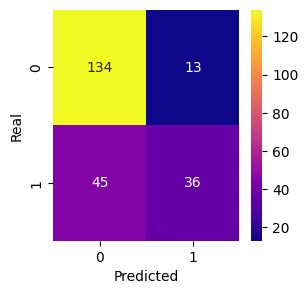

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score

print(f"Accuracy: {round(accuracy_score(y_test,y_pred),3)}")
print(f"Recall: {round(recall_score(y_test,y_pred),5)}")
print(f"Precision: {round(precision_score(y_test,y_pred),3)}")

target_labels = ['0','1']

plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test,y_pred)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g',
            xticklabels=target_labels,
            yticklabels=target_labels)
s_cm.set(xlabel='Predicted',ylabel='Real')
plt.show()

##Solución Pipeline

In [45]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']

X = df[feature_cols].values    # Features
y = df['label'].values         # Target variable

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV


selector = SelectKBest(k=4)
#selector = VarianceThreshold(0.3)
model=DecisionTreeClassifier() 
params = {'criterion': ['entropy', 'gini','log_loss'], 
          'max_depth': [1, 2, 3, 4, 5, 10, 20, 50,100],
          'min_samples_leaf': [1, 2, 5, 10, 20,50,100],#minimo num de objetos para dividir un nodo
          }

pl = Pipeline([('selector' , selector),
               ('scaler',MinMaxScaler()),
               ('grid',GridSearchCV(model, params, cv=5, n_jobs = -1, refit=True))])
 

In [67]:
pl.fit(X_train,y_train)


Pipeline(steps=[('selector', SelectKBest(k=4)), ('scaler', MinMaxScaler()),
                ('grid',
                 GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                              n_jobs=-1,
                              param_grid={'criterion': ['entropy', 'gini',
                                                        'log_loss'],
                                          'max_depth': [1, 2, 3, 4, 5, 10, 20,
                                                        50, 100],
                                          'min_samples_leaf': [1, 2, 5, 10, 20,
                                                               50, 100]}))])

In [68]:
pl['grid'].best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [69]:
print(f"Best score: {pl['grid'].best_score_:.4f}")

Best score: 0.7618


In [70]:
#feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
pl['selector'].get_feature_names_out()

array(['x2', 'x3', 'x4', 'x6'], dtype=object)

## Predicciones

Veamos las predicciones en el conjunto de prueba.

In [78]:
y_pred_test3 = pl.predict(X_test)


In [79]:
print(f"Valores de prueba:\n{y_test[:5]}")
print(f"Valores predichos:\n{np.round(y_pred_test3[:5],2)}")

Valores de prueba:
[0 1 1 0 1]
Valores predichos:
[0 0 1 0 0]


In [80]:
CM5 = confusion_matrix(y_test, y_pred_test3)
print(CM5)

[[128  19]
 [ 31  50]]


In [81]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score

print(f"Accuracy: {round(accuracy_score(y_test, y_pred_test3),5)}")
print(f"Recall: {recall_score(y_test, y_pred_test3)}")
print(f"Precision: {precision_score(y_test, y_pred_test3)}")
print(f"f1 score: {f1_score(y_test, y_pred_test3)}")
"""
Métricas profesor
Accuracy: 0.753
Recall: 0.753
Precision: 0.64
"""


Accuracy: 0.7807
Recall: 0.6172839506172839
Precision: 0.7246376811594203
f1 score: 0.6666666666666666


'\nMétricas profesor\nAccuracy: 0.753\nRecall: 0.753\nPrecision: 0.64\n'

In [ ]:
##################################################################################

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler,StandardScaler

selector = SelectKBest(k=4) #K=Número de características principales para seleccionar. 
#selector = VarianceThreshold(0.3)
clf = DecisionTreeClassifier(ccp_alpha= 0.0,
 class_weight= None,
 criterion='gini' ,#'log_loss',
 max_depth= 5,#10,
 max_features= None,
 max_leaf_nodes= None,
 min_impurity_decrease= 0.0,
 min_samples_leaf= 10,#5,
 min_samples_split= 2,#4,
 min_weight_fraction_leaf= 0.0,
 random_state= None,
 splitter= 'best') 

pl2 = Pipeline([('selector',selector),
               ('scaler',StandardScaler()),
               ('clasificador',clf)])

pl2.fit(X_train,y_train)
pl2.score(X_train,y_train)

0.8223062381852552

## Predicciones

Veamos las predicciones en el conjunto de prueba.

In [71]:
y_pred_test2 = pl2.predict(X_test)


In [72]:
print(f"Valores de prueba:\n{y_test[:5]}")
print(f"Valores predichos:\n{np.round(y_pred_test2[:5],2)}")

Valores de prueba:
[0 1 1 0 1]
Valores predichos:
[0 0 1 0 0]


In [73]:
CM4 = confusion_matrix(y_test, y_pred_test2)
print(CM4)

[[128  19]
 [ 31  50]]


In [74]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score

print(f"Accuracy: {round(accuracy_score(y_test, y_pred_test2),5)}")
print(f"Recall: {recall_score(y_test, y_pred_test2)}")
print(f"Precision: {precision_score(y_test, y_pred_test2)}")
print(f"f1 score: {f1_score(y_test, y_pred_test2)}")
"""
Métricas profesor
Accuracy: 0.753
Recall: 0.753
Precision: 0.64
"""


Accuracy: 0.7807
Recall: 0.6172839506172839
Precision: 0.7246376811594203
f1 score: 0.6666666666666666


'\nMétricas profesor\nAccuracy: 0.753\nRecall: 0.753\nPrecision: 0.64\n'

Podemos obtener la importancia de las features

In [75]:
pl2['clasificador'].feature_importances_

array([0.21339523, 0.09373499, 0.58230319, 0.11056658])

In [76]:
importances_df = pd.DataFrame({'feature':pl2['selector'].get_feature_names_out(),'importancia':np.round(pl2['clasificador'].feature_importances_,3)})
importances_df.sort_values(by='importancia',ascending=False,inplace=True)
importances_df.set_index('feature')
#feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
##feature_cols = [x0,x1,x2,x3,x4,x5,x6]


importancia
feature             
x4             0.582
x2             0.213
x6             0.111
x3             0.094

### Plot tree with sklearn

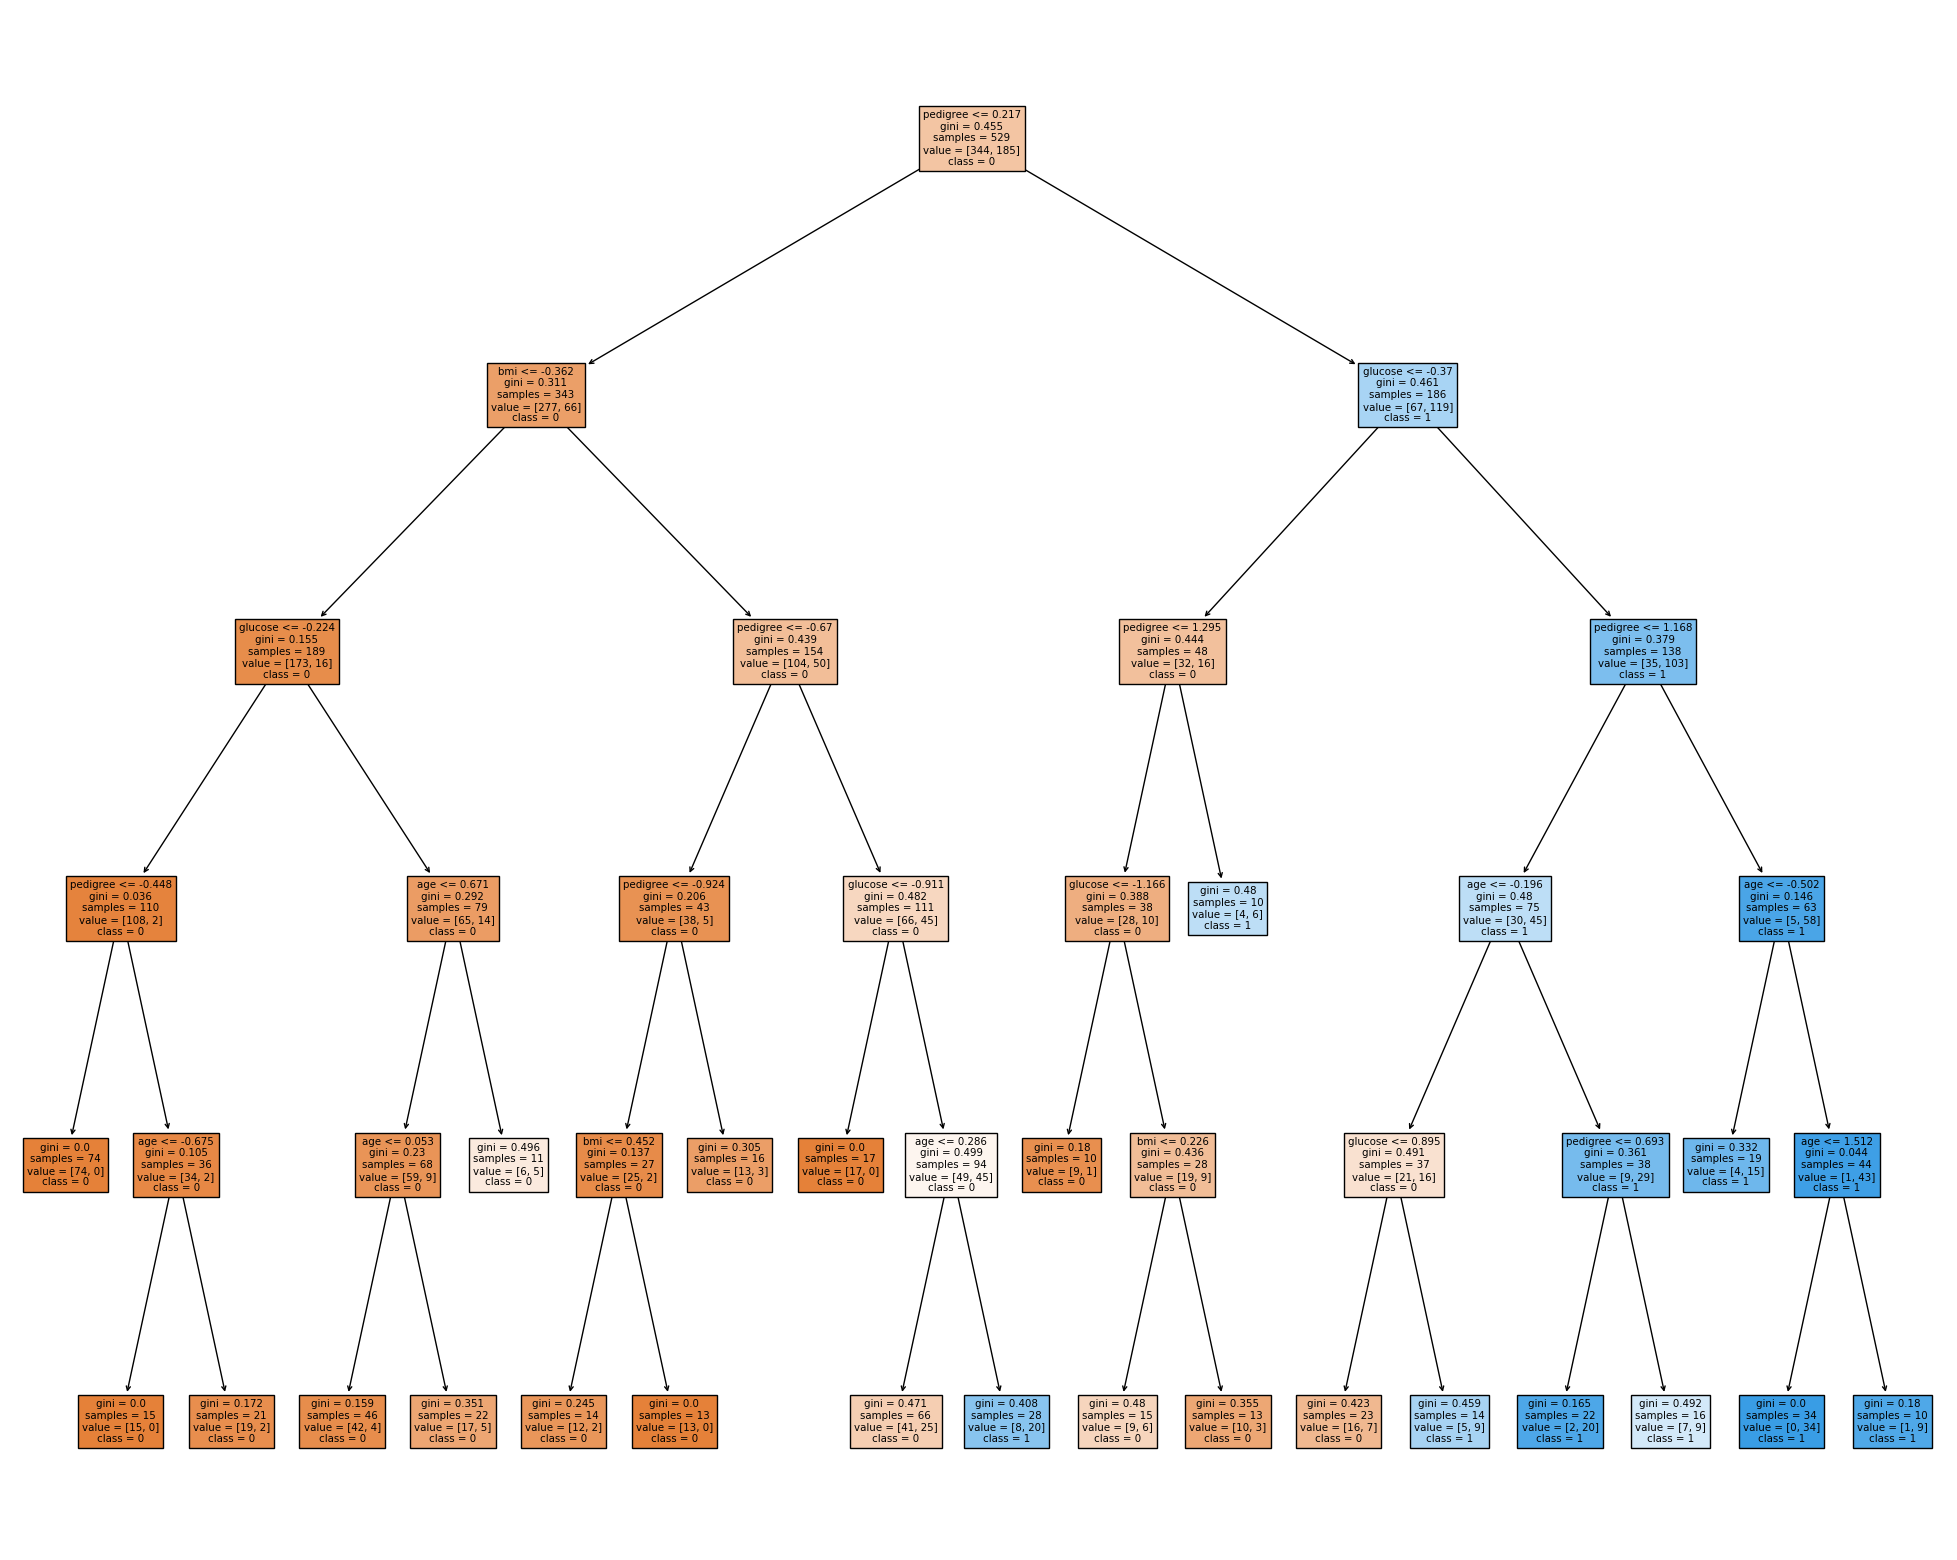

In [77]:
feature_cols1 = [ 'glucose','bmi','pedigree','age']

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(pl2['clasificador'], 
                   feature_names=feature_cols1,  
                   class_names=['0','1'],
                   filled=True)
